# Importing the libraries and Dataset

In [117]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values
y = dataset.iloc[:, -1].values

In [118]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [119]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [120]:
y = y.reshape(len(y), 1)
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


# Feature Scaling

In [121]:
from sklearn.preprocessing import StandardScaler
feature_scaler = StandardScaler()
variable_scaler = StandardScaler()
X = feature_scaler.fit_transform(X)
y = variable_scaler.fit_transform(y)

In [122]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [123]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


In [124]:
# Training the SVR model on the whole dataset
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(X, y)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)

# Predicting A new Result

In [125]:
# because we used feature scaling on X and y both we have to provide scaled input and we will get scaled output. To get the exact output, we have to descale it.

variable_scaler.inverse_transform(regressor.predict(feature_scaler.transform([[6.5]])))
# print(y_pred)
# varible_scaler.inverse_transform(y_pred)

array([170370.0204065])

## Visualising the SVR results

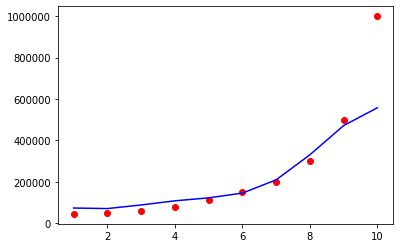

In [132]:
plt.scatter(feature_scaler.inverse_transform(X), variable_scaler.inverse_transform(y), color = 'red')
plt.plot(feature_scaler.inverse_transform(X), variable_scaler.inverse_transform(regressor.predict(X)), color = 'blue')
plt.show()

In [133]:
regressor.score(X, y)

0.7516001070620798